In [11]:
import os

import numpy as np
from scipy.special import softmax

# from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
%config InlineBackend.figure_format = 'retina' # render double resolution plot output for Retina screens

In [2]:
arr = np.load(os.path.join('vis-gender', 'e08.npz'))

user_embs, targets = arr['arr_0'], arr['arr_1']
print(user_embs.shape, targets.shape)
print(len(set(targets)))

(6413, 128) (6413,)
2


In [3]:
X = user_embs
y = targets
tsne = TSNE(verbose=1)
X_embedded = tsne.fit_transform(X)
print(X_embedded.shape)
print(X_embedded[:2])

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 6413 samples in 0.036s...
[t-SNE] Computed neighbors for 6413 samples in 2.175s...
[t-SNE] Computed conditional probabilities for sample 1000 / 6413
[t-SNE] Computed conditional probabilities for sample 2000 / 6413
[t-SNE] Computed conditional probabilities for sample 3000 / 6413
[t-SNE] Computed conditional probabilities for sample 4000 / 6413
[t-SNE] Computed conditional probabilities for sample 5000 / 6413
[t-SNE] Computed conditional probabilities for sample 6000 / 6413
[t-SNE] Computed conditional probabilities for sample 6413 / 6413
[t-SNE] Mean sigma: 0.204024
[t-SNE] KL divergence after 250 iterations with early exaggeration: 76.650650
[t-SNE] KL divergence after 1000 iterations: 1.512640
(6413, 2)
[[-66.09702    -4.7141376]
 [ -6.4889216 -34.326603 ]]


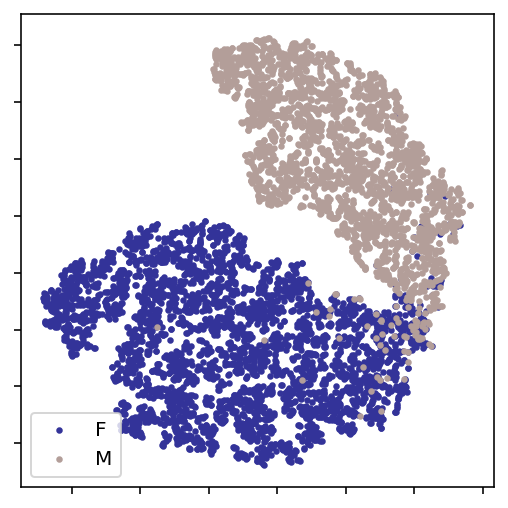

In [17]:
fig, (ax1) = plt.subplots(1, 1, figsize=(3.33, 3.33))

# https://matplotlib.org/tutorials/colors/colormaps.html#sequential2
# https://matplotlib.org/api/pyplot_summary.html
colors = iter(cm.terrain(np.linspace(0, 0.85, len(set(y)))))
for (i, c) in enumerate(set(y)):
    xc1 = [p[0] for (j, p) in enumerate(X_embedded) if y[j]==c]
    xc2 = [p[1] for (j, p) in enumerate(X_embedded) if y[j]==c]
    lb = 'M' if c == 1 else 'F'
    ax1.scatter(xc1, xc2, color=next(colors), s=5, label=lb)

# ax1.xaxis.set_ticks()
# ax1.yaxis.set_ticks()
ax1.xaxis.set_major_formatter(plt.NullFormatter())
ax1.yaxis.set_major_formatter(plt.NullFormatter())

ax1.legend(loc="lower left", fontsize=10)

plt.tight_layout(pad=0, h_pad=0, w_pad=0)
plt.savefig(os.path.join('clustering1.pdf'), bbox_inches='tight', dpi=200)

In [9]:
arr2 = np.load(os.path.join('vis-income', 'e15.npz'))

user_embs2, targets2 = arr2['arr_0'], arr2['arr_1']
print(user_embs2.shape, targets2.shape)
print(len(set(targets2)))
X2 = user_embs2
y2 = targets2
tsne2 = TSNE(verbose=1)
X_embedded2 = tsne.fit_transform(X2)
print(X_embedded2.shape)
print(X_embedded2[:2])

(6413, 128) (6413,)
10
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 6413 samples in 0.036s...
[t-SNE] Computed neighbors for 6413 samples in 5.408s...
[t-SNE] Computed conditional probabilities for sample 1000 / 6413
[t-SNE] Computed conditional probabilities for sample 2000 / 6413
[t-SNE] Computed conditional probabilities for sample 3000 / 6413
[t-SNE] Computed conditional probabilities for sample 4000 / 6413
[t-SNE] Computed conditional probabilities for sample 5000 / 6413
[t-SNE] Computed conditional probabilities for sample 6000 / 6413
[t-SNE] Computed conditional probabilities for sample 6413 / 6413
[t-SNE] Mean sigma: 1.050773
[t-SNE] KL divergence after 250 iterations with early exaggeration: 82.017838
[t-SNE] KL divergence after 1000 iterations: 1.910563
(6413, 2)
[[ 65.22595     9.0526495]
 [-41.224354    3.3023052]]


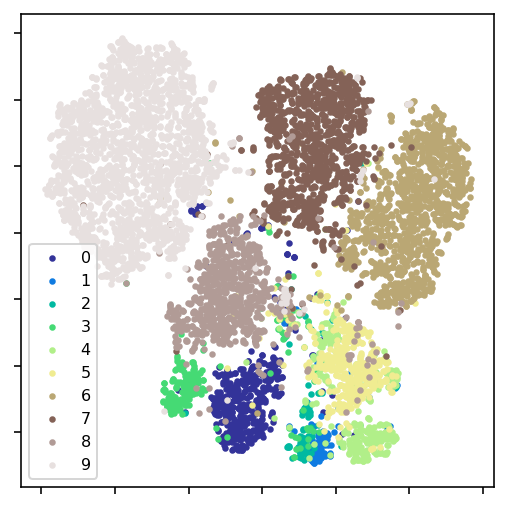

In [16]:
fig, (ax1) = plt.subplots(1, 1, figsize=(3.33, 3.33))

# https://matplotlib.org/tutorials/colors/colormaps.html#sequential2
# https://matplotlib.org/api/pyplot_summary.html
colors2 = iter(cm.terrain(np.linspace(0, 0.95, len(set(y2)))))
for (i, c) in enumerate(set(y2)):
    xc1 = [p[0] for (j, p) in enumerate(X_embedded2) if y2[j]==c]
    xc2 = [p[1] for (j, p) in enumerate(X_embedded2) if y2[j]==c]
    ax1.scatter(xc1, xc2, color=next(colors2), s=5, label=c)

# ax1.xaxis.set_ticks()
# ax1.yaxis.set_ticks()
ax1.xaxis.set_major_formatter(plt.NullFormatter())
ax1.yaxis.set_major_formatter(plt.NullFormatter())

ax1.legend(loc="lower left", fontsize=8)

plt.tight_layout(pad=0, h_pad=0, w_pad=0)
plt.savefig(os.path.join('clustering2.pdf'), bbox_inches='tight', dpi=200)